In [1]:
import requests
import bs4
import pandas as pd
import json
import numpy as np
import re

In [2]:
payloadHeader = {
    "Content-Type": "application/json",
}

payloadData = {
    "instrumentType":"EQUITY",
    "pageNumber":1,
    "sortColumn":"NORMALIZED_TICKER",
    "sortOrder":"ASC",
    "maxResultsPerPage":1000000,
    "filterToken":"",
}

In [3]:
url = "https://www.nyse.com/api/quotes/filter"
html = requests.post(url, data=json.dumps(payloadData), headers=payloadHeader)
listing = json.loads(html.text)

In [4]:
fileObject = open('listing.json', 'w')
fileObject.write(html.text)
fileObject.close()

In [5]:
# url = f"https://finance.yahoo.com/quote/AA/profile"
# html = requests.get(url)
# response = bs4.BeautifulSoup(html.content,"lxml")
# executives = response.find('table',class_ = 'W(100%)').find_all('tr',class_ = 'C($primaryColor) BdB Bdc($seperatorColor) H(36px)')


In [5]:
with open('tech_words.txt') as f:
    flat_list=list({word.lower() for line in f for word in line.split()})


In [6]:
flat_list.remove('director')
flat_list.remove('officer')
flat_list.remove('it')
flat_list.remove('of')
flat_list.remove('commercial')
flat_list.remove('communications')
flat_list.remove('people')
flat_list.remove('the')
flat_list.remove('agency')
flat_list.remove('board')

In [7]:
def stats_exec(response):
    executives = response.find('table',class_ = 'W(100%)').find_all('tr',class_ = 'C($primaryColor) BdB Bdc($seperatorColor) H(36px)')
    gender_list = []
    age_list = []
    title_list = []
    tech_words = []
    for i in range(5):
        temp = executives[i]
        name = temp.find('td',class_ = 'Ta(start)').get_text().strip()
        if name[:2] == 'Mr':
            gender = 'M'
        elif name[:2] == 'Ms' or name[:3] == 'Mrs':
            gender = 'F'
        else:
            gender = 'Na'
        gender_list.append(gender)

        title = temp.find('td',class_ = 'Ta(start) W(45%)').get_text().strip()
        title_list.append(title)
        total_title = ' ; '.join(str(i) for i in title_list)

        birth_year = temp.find_all('td',class_ = 'Ta(end)')[-1].get_text().strip()
        if birth_year == 'N/A':
            age = float('nan')
        #'N' means Na
        else:
            import datetime
            current_year = int(datetime.datetime.now().year)
            age = current_year - int(birth_year)
        age_list.append(age)
    male_rate = gender_list.count('M')/ len(gender_list)
    average_age = np.nanmean(age_list)
    age_below_40 = len([x for x in age_list if x <=40])
    tech_score = 0
    for i in flat_list:
        i = ' '+i+' '
        if i in total_title.lower():
            tech_words.append(i.strip())
            tech_score += 1
    return male_rate,average_age,age_below_40,tech_score,tech_words,total_title

In [8]:
def get_stats():
    stats = list()
    for i in range(6446):
        ticker = listing[i]["symbolTicker"].replace('.', '').split("-")[0]
        name = listing[i]["instrumentName"]
        url = f"https://finance.yahoo.com/quote/{ticker}/profile"
        html = requests.get(url)
        response = bs4.BeautifulSoup(html.content,"lxml")
        try:
            [male_rate,average_age,age_below_40,tech_score,tech_words,total_title] = stats_exec(response)
        except:
            print('fail')
            [male_rate,average_age,age_below_40,tech_score,tech_words,total_title] = [None,]*6
        
        stats.append((ticker,male_rate,average_age,age_below_40,tech_score,tech_words,total_title))
        
    return stats

In [9]:
stats = get_stats()

fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: Mean of empty slice


fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail


In [10]:
len(stats)

6446

In [11]:
df_stats = pd.DataFrame(stats,columns = ['ticker','male_rate','average_age','age_below_40','tech_score','tech_words',
                                             'total_title']).drop_duplicates('ticker')
df_stats.tail()


,ticker,male_rate,average_age,age_below_40,tech_score,tech_words,total_title
6441,ZLAB,0.4,51.00,0.0,0.0,[],"Founder, Chairman & CEO ; Pres, COO & Director..."
6442,ZM,0.4,45.25,1.0,0.0,[],"Founder, Pres, CEO, Chairman & Sec. ; Chief Le..."
6443,ZN,1.0,68.25,0.0,0.0,[],"Founder, Exec. Chairman & CEO ; Pres, Gen. Cou..."
6444,ZNGA,0.8,50.80,0.0,0.0,[],Founder & Non Exec. Chairman ; CEO & Director ...
6445,ZNH,1.0,57.00,0.0,0.0,[],"Chairman ; Vice Chairman & Pres ; CFO, Chief A..."


In [12]:
df = pd.read_excel('/Users/yzq/Desktop/2020spring/DMI/week_4/D&B_dataset_v6.xlsx', sheet_name = 0)

In [14]:
df.rename(columns = {'Ticker':'ticker'}, inplace = True) 

In [16]:
df_new = df.merge(df_stats, on = 'ticker', how = 'left')
df_new.tail()

,ticker,Name,Website,Sector,Industry,Description,Key_Words,Facebook,Twitter,Linkedin,...,pageviews_60d,num_sections,num_redir_links,num_references,male_rate,average_age,age_below_40,tech_score,tech_words,total_title
5220,ZUO,ZUORA INC,http://www.zuora.com,Technology,Software‚ÄîInfrastructure,"Zuora, Inc. provides cloud-based software on a...","subscription, designed, marketplace, billing, ...",https://www.facebook.com/zuora,https://twitter.com/zuora,https://www.linkedin.com/company/zuora,...,1990.0,12.0,4.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN
5221,ZVO,ZOVIO INC,http://www.zovio.com,Consumer Defensive,Education & Training Services,Zovio Inc operates as an education technology ...,"education, degree, changed, data, tutoring",https://www.facebook.com/ZovioSolutions,https://twitter.com/ZovioSolutions,NaN,...,1180.0,3.0,1.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN
5222,ZYME,ZYMEWORKS INC,http://www.zymeworks.com,Healthcare,Biotechnology,"Zymeworks Inc., a clinical-stage biopharmaceut...","bispecific, collaboration, celgene, gastric, r...",NaN,https://twitter.com/ZymeworksInc,https://www.linkedin.com/company/zymeworks/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5223,ZYNE,ZYNERBA PHARMACEUTICALS INC,http://www.zynerba.com,Healthcare,Biotechnology,"Zynerba Pharmaceuticals, Inc. operates as a cl...","clinical, trial, adolescent, phase, developing",NaN,https://twitter.com/ZynerbaPharma,https://www.linkedin.com/company/zynerba-pharm...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5224,ZYXI,ZYNEX INC,http://www.zynex.com,Healthcare,Medical Devices,"Zynex, Inc., through its subsidiaries, designs...","electrical, stimulation, blood, use, volume",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_new.to_csv('D&B_dataset_v7.csv')

In [48]:
age_by_sector = df_new.groupby('Sector', as_index=False)['average_age'].mean()
age_by_sector = age_by_sector.sort_values(by = ['average_age'])
age_by_sector.to_csv('average_age.csv')

In [50]:
score_by_sector = df_new.groupby('Sector', as_index=False)['tech_score'].sum()
score_by_sector = score_by_sector.sort_values(by = ['tech_score'], ascending=False)
score_by_sector.to_csv('tech_score.csv')

In [53]:
male_by_sector = df_new.groupby('Sector', as_index=False)['male_rate'].mean()
male_by_sector = male_by_sector.sort_values(by = ['male_rate'])
male_by_sector.to_csv('male_rate.csv')

In [56]:
under40_by_sector = df_new.groupby('Sector', as_index=False)['age_below_40'].sum()
under40_by_sector = under40_by_sector.sort_values(by = ['age_below_40'], ascending=False)
under40_by_sector.to_csv('under_40.csv')


In [34]:
group_by_sector = df_new.groupby(['Sector']).size().to_frame()
group_by_sector.rename(columns = {0:'amount'},inplace = True)

import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
group_by_sector['amount'].sort_values(ascending=False).plot(kind = 'bar', title = 'Companies Groupby States')


In [18]:
group_by_sector = df_new.groupby(['average_age']).size()
group_by_sector

average_age
33.000000    3
35.000000    1
35.500000    1
35.750000    1
36.200000    1
36.333333    1
36.666667    1
36.750000    1
37.000000    1
37.250000    1
37.333333    1
37.600000    1
37.750000    1
37.800000    2
38.000000    3
38.200000    2
38.250000    1
38.333333    1
38.400000    1
38.800000    1
39.000000    3
39.200000    1
39.250000    2
39.333333    1
39.400000    3
39.600000    1
40.000000    3
40.200000    1
40.250000    1
40.333333    1
            ..
67.333333    2
67.400000    1
67.500000    3
67.600000    1
67.800000    2
68.000000    4
68.250000    2
68.400000    2
68.500000    3
68.750000    1
69.000000    2
69.200000    1
69.333333    1
69.750000    1
70.000000    2
70.200000    2
70.400000    1
70.750000    2
71.000000    2
71.750000    1
72.500000    1
73.500000    1
75.000000    1
76.000000    1
76.400000    1
77.000000    1
78.000000    1
79.000000    1
79.500000    1
82.000000    1
Length: 313, dtype: int64

In [57]:
df_stats.describe()

,male_rate,average_age,age_below_40,tech_score
count,4522.000000,4499.000000,4522.000000,4522.000000
mean,0.784387,54.949722,0.191066,0.398939
std,0.217269,5.246392,0.529367,0.639397
min,0.000000,33.000000,0.000000,0.000000
25%,0.600000,52.000000,0.000000,0.000000
50%,0.800000,55.000000,0.000000,0.000000
75%,1.000000,58.200000,0.000000,1.000000
max,1.000000,82.000000,5.000000,4.000000


In [60]:
np.percentile(df_stats['average_age'],90)


nan

In [63]:
df_new.quantile(.01, axis = 0) 

dummy_1                                     0.000000
dummy_2                                     0.000000
dummy_3                                     0.000000
dummy_4                                     0.000000
dummy_5                                     0.000000
dummy_6                                     0.000000
media_percentage                            0.000000
margin_1_1                                -70.561192
margin_1_2                                -89.872346
change_1                                   -9.903569
margin_2_1                                -64.520815
margin_2_2                                -81.013514
change_2                                  -17.862539
followers                                  34.060000
friends                                     2.030000
tweets                                     35.000000
verified                                    0.000000
avg_retweet                                 0.000000
avg_favourite                               0.

In [ ]:
df.quantile([.1, .25, .5, .75], axis = 0)

In [64]:
df = df_new[['number_of_full-time_employee','Shares_Held_by_All_Insider','Shares_Held_by_Institutions','Float_Held_by_Institutions','Number_of_Institutions_Holding_Shares','male_rate','average_age','age_below_40','tech_score']]

In [69]:
percentile = df.quantile([.01, .05, .10, .25, .75, .90, .95, .99], axis = 0)

In [74]:
percentile = percentile.swapaxes("index", "columns")

In [76]:
percentile.to_csv('percentile.csv')

In [97]:
len(df[df['male_rate']==np.NaN])

0

In [98]:
df.skew(axis = 0, skipna = True) 

number_of_full-time_employee             22.250470
Shares_Held_by_All_Insider                2.042472
Shares_Held_by_Institutions              -0.061395
Float_Held_by_Institutions              -71.531218
Number_of_Institutions_Holding_Shares     3.847724
male_rate                                -0.960515
average_age                              -0.115549
age_below_40                              3.700281
tech_score                                1.632641
dtype: float64

In [99]:
df.kurt(axis = 0, skipna = True) 

number_of_full-time_employee              816.241575
Shares_Held_by_All_Insider                  4.756779
Shares_Held_by_Institutions                -1.067788
Float_Held_by_Institutions               5116.810080
Number_of_Institutions_Holding_Shares      20.417499
male_rate                                   0.480185
average_age                                 1.410258
age_below_40                               17.714476
tech_score                                  2.813121
dtype: float64

In [101]:
np.count_nonzero(df, axis=1)

array([8, 4, 6, ..., 9, 9, 9])

In [109]:
df.st(0).sum()

AttributeError: 'DataFrame' object has no attribute 'st'

In [110]:
len(df)

5225

In [2]:
df = pd.read_csv('dataset_w4.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5225 entries, 0 to 5224
Data columns (total 68 columns):
Unnamed: 0                               5225 non-null int64
Ticker                                   5224 non-null object
Name                                     5224 non-null object
Website                                  5223 non-null object
Sector                                   5216 non-null object
Industry                                 5216 non-null object
Description                              5224 non-null object
Key_Words                                5224 non-null object
Facebook                                 2630 non-null object
Twitter                                  2955 non-null object
Linkedin                                 2939 non-null object
Youtube                                  1900 non-null object
Instagram                                1241 non-null object
wikipedia                                1833 non-null object
dummy_1                   

In [3]:
df_sub = df[(df['margin_change']>-100) & (df['margin_change']<100)]


In [173]:
df['male_rate'] = df['male_rate']*100

In [176]:
df['male_rate'][:20]

0     100.0
1      80.0
3      80.0
4     100.0
5      80.0
6     100.0
7      40.0
8      80.0
9     100.0
10     60.0
11    100.0
13    100.0
14    100.0
15     80.0
17     60.0
18     60.0
19     80.0
21     60.0
23    100.0
24      NaN
Name: male_rate, dtype: float64

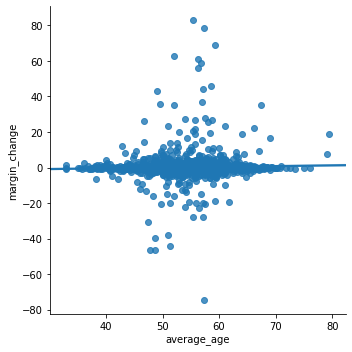

In [8]:
import seaborn
seaborn.lmplot(y='margin_change', x='average_age', data=df_sub)

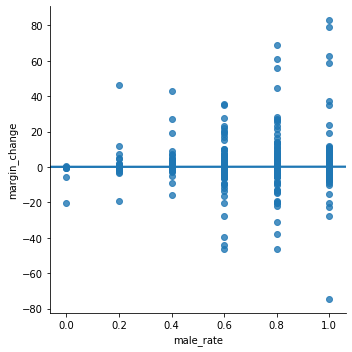

In [9]:
seaborn.lmplot(y='margin_change', x='male_rate', data=df_sub)

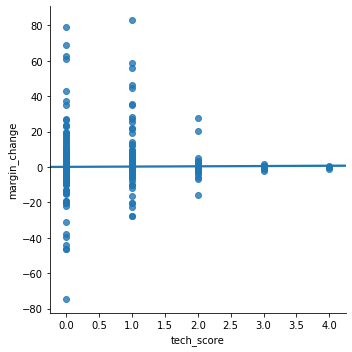

In [11]:
seaborn.lmplot(y='margin_change', x='tech_score', data=df_sub)

In [17]:
df_sub2   = df_sub[df_sub['number_of_full-time_employee']<100000]

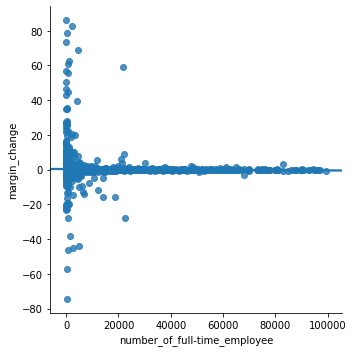

In [18]:
seaborn.lmplot(y='margin_change', x='number_of_full-time_employee', data=df_sub2)

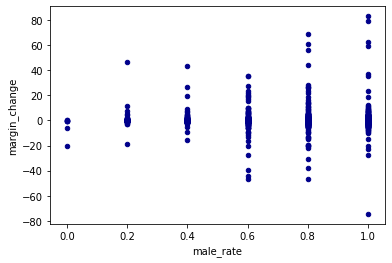

In [177]:
ax1_sub = df_sub.plot.scatter(x='male_rate',
                      y='margin_change',
                      c='DarkBlue')

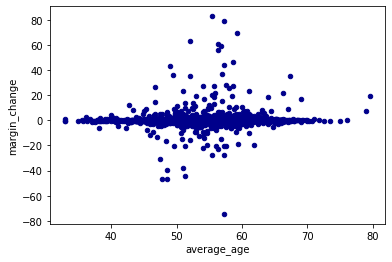

In [133]:
ax2_sub = df_sub.plot.scatter(x='average_age',
                      y='margin_change',
                      c='DarkBlue')

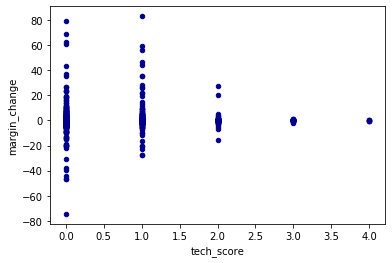

In [139]:
ax3_sub = df_sub.plot(x='tech_score',
                      y='margin_change',
                      c='DarkBlue',
                     kind = 'scatter')

In [127]:
margin_by_sector = df.groupby('Sector', as_index=False)['margin_change'].mean()
margin_by_sector = margin_by_sector.sort_values(by = ['margin_change'], ascending=False)
margin_by_sector.to_csv('margin_change.csv')

In [128]:
margin_by_sector

,Sector,margin_change
7,Healthcare,1.647813
9,Industrials,0.891498
2,Consumer Cyclical,0.732159
12,Technology,0.523475
0,Basic Materials,0.523147
1,Communication Services,0.393242
4,Energy,0.345822
10,Real Estate,0.314265
13,Utilities,0.176394
6,Financial Services,0.167400


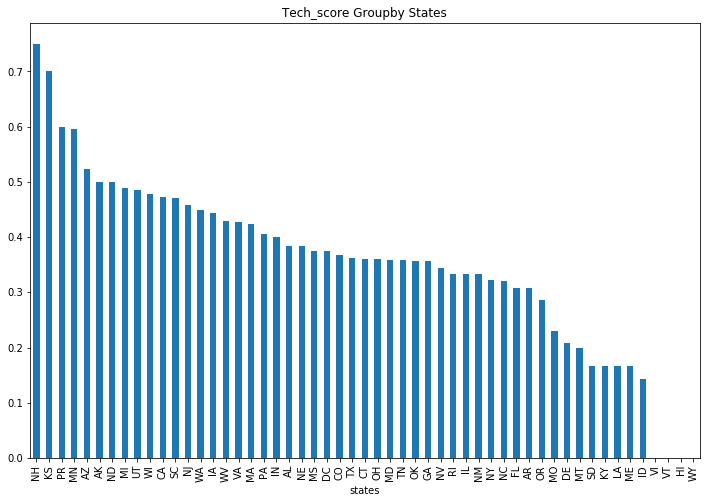

In [149]:
df = df[df['country'] == 'United States']
group_by_sector = df.groupby(['states'])['tech_score'].mean().to_frame()
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
group_by_sector['tech_score'].sort_values(ascending=False).plot(kind = 'bar', title = 'Tech_score Groupby States')


In [151]:
def get_subset():
    d = {}
    for i in df['Sector'].unique():
        d[i] = pd.DataFrame()
    for key in d.keys():
        d[key] = df[df['Sector'] == f'{key}']
    return d

In [153]:
d = get_subset()

In [158]:
d['Healthcare']

,Unnamed: 0,Ticker,Name,Website,Sector,Industry,Description,Key_Words,Facebook,Twitter,...,total_title,date_1,date_2,revenue_1,revenue_2,opincome_1,opincome_2,margin_1,margin_2,margin_change
0,0,A,AGILENT TECHNOLOGIES INC,http://www.agilent.com,Healthcare,Diagnostics & Research,"Agilent Technologies, Inc. provides applicatio...","spectrometry, applied, laboratory, gene, cell",https://www.facebook.com/Agilent.Tech,https://twitter.com/agilent,...,"CEO, Pres & Director ; Sr. VP & CFO ; Sr. VP, ...",10/30/2018,10/30/2017,4914000.0,4472000.0,928000.0,841000.0,0.188848,0.188059,0.004196
17,17,ABBV,ABBVIE INC,http://www.abbvie.com,Healthcare,Drug Manufacturers-General,"AbbVie Inc. discovers, develops, manufactures,...","treat, chronic, genotype, virus, adults",https://www.facebook.com/AbbVieGlobal,https://twitter.com/abbvie,...,Chairman & CEO ; Vice Chairman & Pres ; Exec. ...,12/30/2018,12/30/2017,32753000.0,28216000.0,6807000.0,9919000.0,0.207828,0.351538,-0.408803
18,18,ABC,AMERISOURCEBERGEN CORPORATION,http://www.amerisourcebergen.com,Healthcare,Medical Distribution,AmerisourceBergen Corporation sources and dist...,"healthcare, pharmaceutical, distributes, retai...",https://www.facebook.com/AmerisourceBergen/,https://twitter.com/Healthcare_ABC,...,"Chairman, Pres & CEO ; Exec. VP & CFO ; Exec. ...",9/29/2018,9/29/2017,167939635.0,153143826.0,1686889.0,2019669.0,0.010045,0.013188,-0.238355
21,21,ABEO,ABEONA THERAPEUTICS INC,http://www.abeonatherapeutics.com,Healthcare,Biotechnology,"Abeona Therapeutics Inc., a clinical-stage bio...","gene, therapy, therapies, treatment, type",https://www.facebook.com/AbeonaBio/,https://twitter.com/abeonabio,...,"Exec. Chairman ; CEO, Head of R&D, Chief Medic...",12/30/2018,12/30/2017,2998.0,837.0,-58166.0,-27836.0,-19.401601,-33.256870,-0.416614
24,24,ABIO,ARCA BIOPHARMA INC,http://arcabio.com,Healthcare,Biotechnology,"ARCA biopharma, Inc. is a biopharmaceutical co...","cardiovascular, support, treatment, developmen...",NaN,NaN,...,NaN,12/30/2018,12/30/2017,NaN,NaN,-18712.0,-16613.0,NaN,NaN,NaN
26,26,ABMD,ABIOMED INC,http://www.abiomed.com,Healthcare,Medical Devices,"Abiomed, Inc. engages in the research, develop...","impella, heart, percutaneous, micro, integrated",https://www.facebook.com/abiomed/,https://twitter.com/abiomedimpella,...,"Chairman, CEO & Pres ; CFO & VP ; Sr. VP & COO...",3/30/2018,3/30/2017,593749.0,445304.0,157137.0,90138.0,0.264652,0.202419,0.307447
28,28,ABT,ABBOTT LABORATORIES,http://www.abbott.com,Healthcare,Medical Devices,"Abbott Laboratories discovers, develops, manuf...","test, systems, cardiovascular, diagnostics, care",https://www.facebook.com/Abbott,https://twitter.com/abbottglobal,...,"Chairman & CEO ; Pres, COO & Director ; Exec. ...",12/30/2018,12/30/2017,30578000.0,27390000.0,3650000.0,1726000.0,0.119367,0.063016,0.894240
30,30,ABUS,ARBUTUS BIOPHARMA CORP,http://www.arbutusbio.com,Healthcare,Biotechnology,"Arbutus Biopharma Corporation, a biopharmaceut...","hbv, rnai, rna, corporation, pharmaceuticals",NaN,https://twitter.com/arbutusbio,...,CFO & Chief Accounting Officer ; Chief Devel. ...,12/30/2018,12/30/2017,5900.0,10700.0,-70200.0,-70100.0,-11.898305,-6.551402,0.816146
33,33,ACAD,ACADIA PHARMACEUTICALS INC,http://www.acadia-pharm.com,Healthcare,Biotechnology,"ACADIA Pharmaceuticals Inc., a biopharmaceutic...","treatment, pimavanserin, adjunctive, disease, ...",http://www.facebook.com/sharer/sharer.php?u=ht...,http://twitter.com/share?text=Home&url=https:/...,...,"CEO & Director ; Pres ; Exec. VP, Gen. Counsel...",12/30/2018,12/30/2017,223807.0,124901.0,-247444.0,-292410.0,-1.105613,-2.341134,-0.527745
40,40,ACER,ACER THERAPEUTICS INC,http://www.acertx.com,Healthcare,Biotechnology,"Acer Therapeutics Inc., a pharmaceutical compa...","treatment, phenylbutyrate, commercialization, ...",https://www.facebook.com/AcerTherapeutics/post...,https://twitter.com/acertherapeutic?lang=en,...,"Founder, Pres, CEO & Director ; COO & CFO ; Ch...",12/30/2018,12/30/2017,NaN,NaN,-

ValueError: scatter requires x column to be numeric

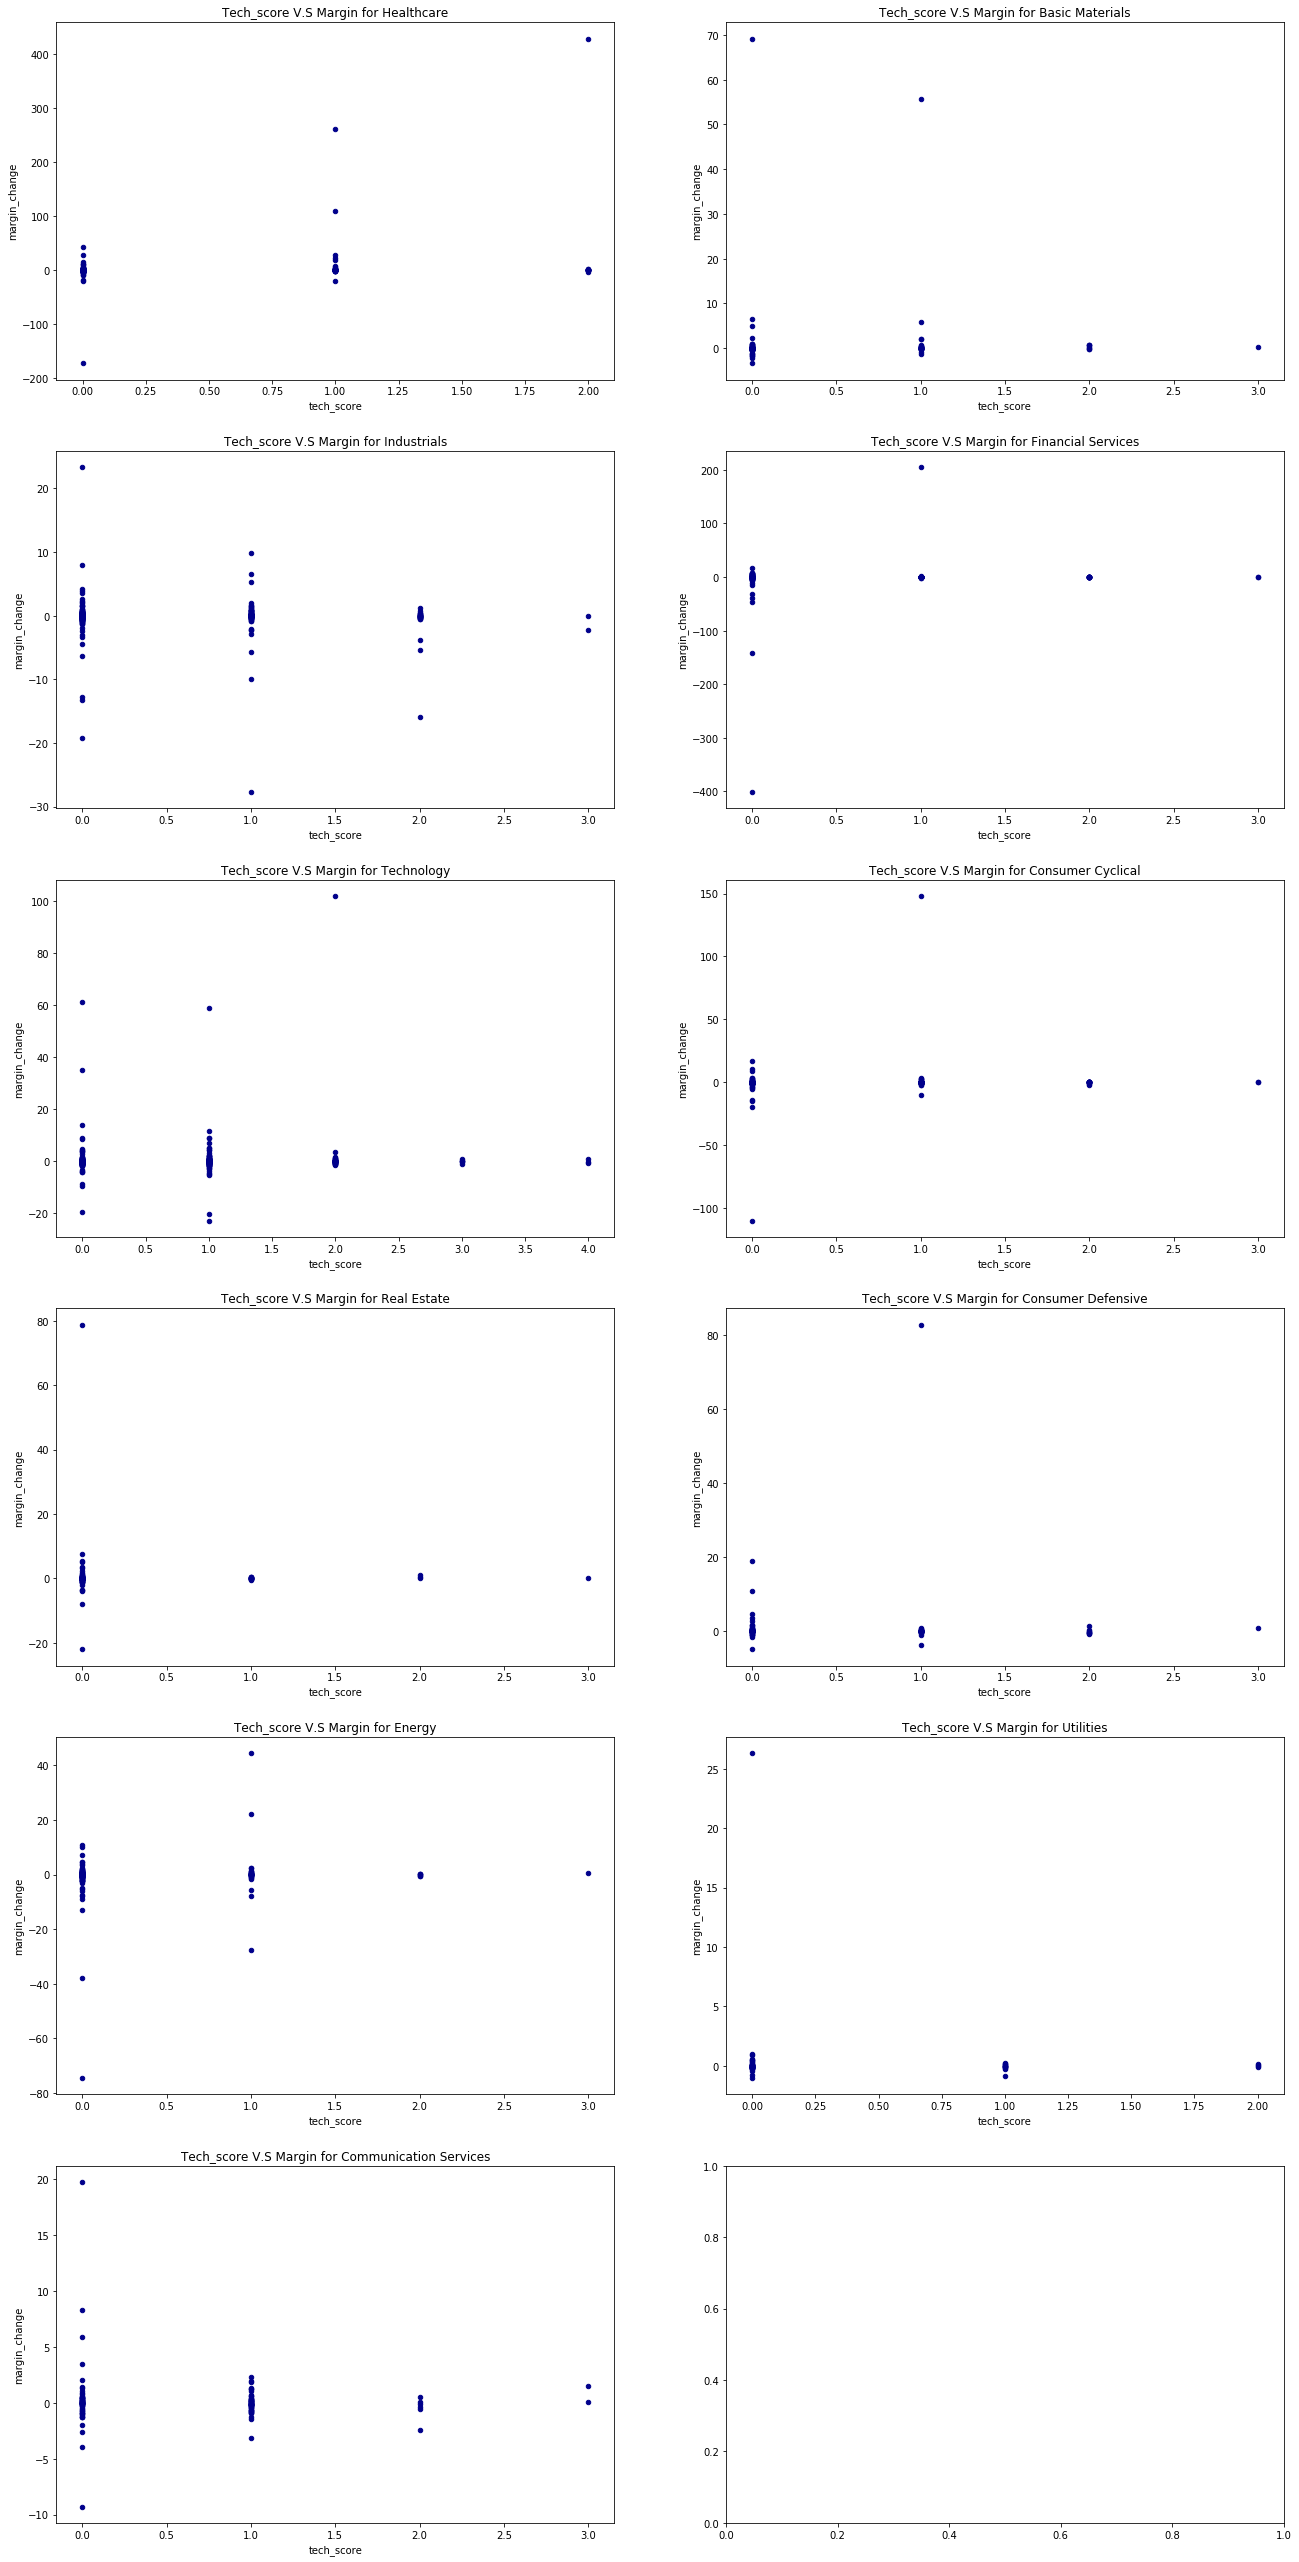

In [164]:
%matplotlib inline
COL_NUM = 2
ROW_NUM = 6
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(22,46))

i = 0
for key in d.keys():
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    d[key].plot(x='tech_score',
                      y='margin_change',
                      c='DarkBlue',
                     kind = 'scatter',
                title = f'Tech_score V.S Margin for {key}',ax = ax)
    i += 1
    
plt.tight_layout()

ValueError: scatter requires x column to be numeric

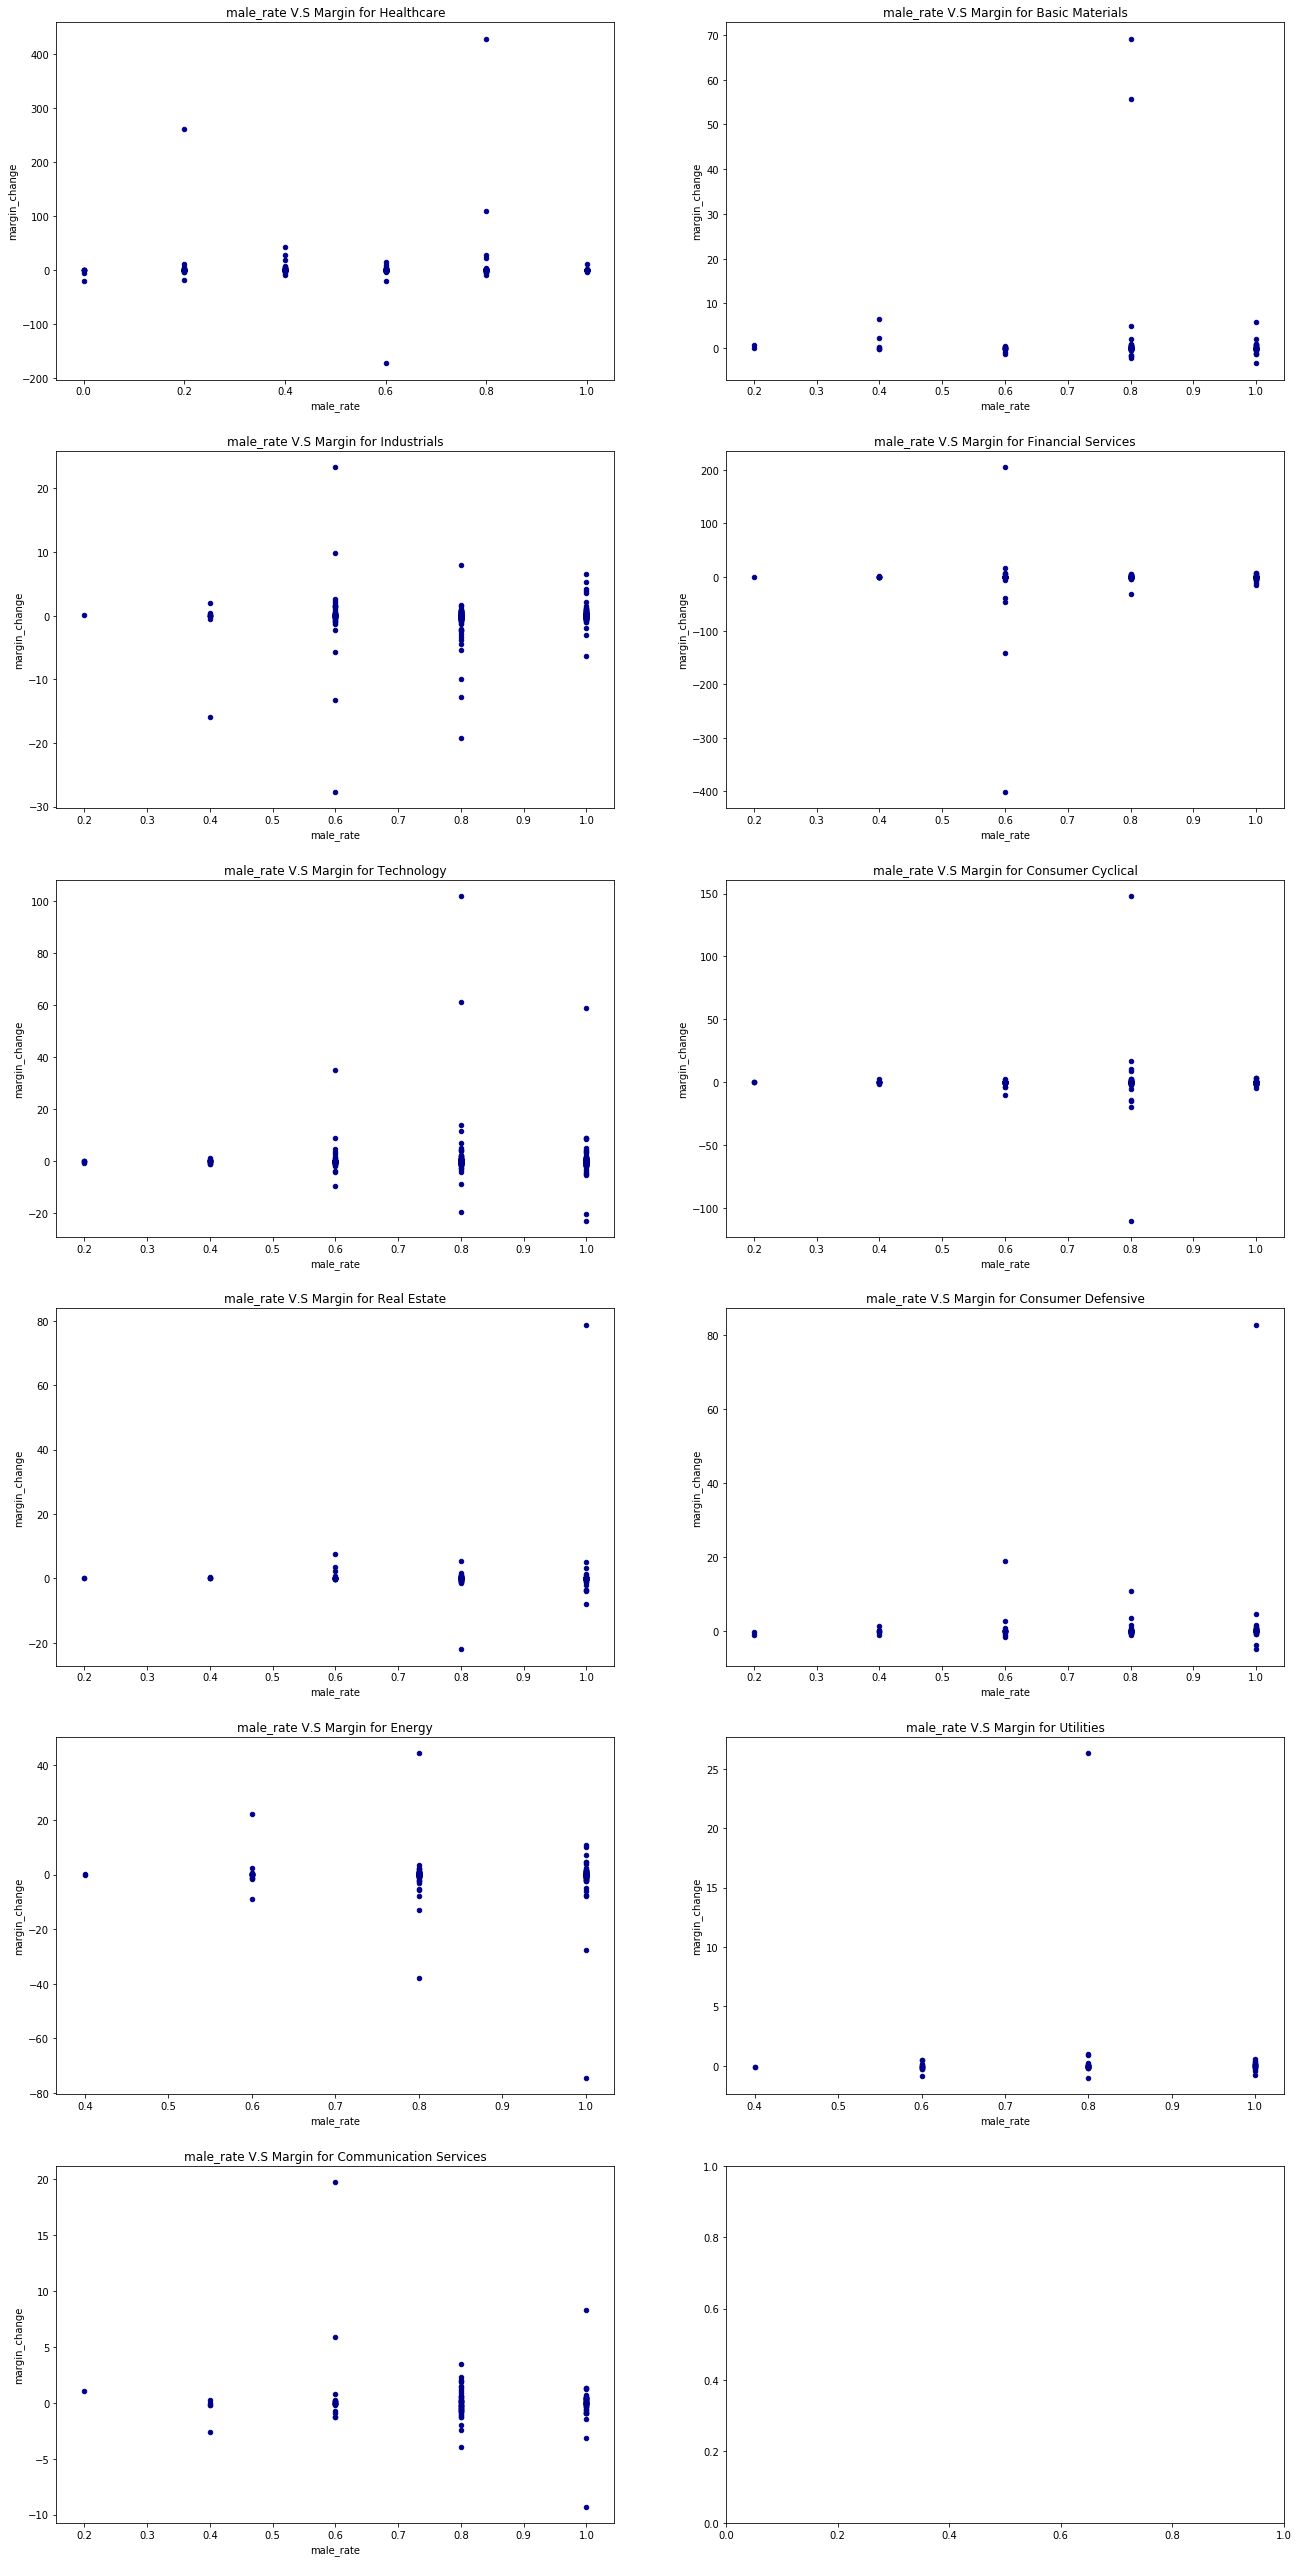

In [167]:
%matplotlib inline
COL_NUM = 2
ROW_NUM = 6
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(22,46))

i = 0
for key in d.keys():
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    d[key].plot.scatter(x='male_rate',
                      y='margin_change',
                      c='DarkBlue',
                title = f'male_rate V.S Margin for {key}',ax = ax)
    i += 1
    
plt.tight_layout()

ValueError: scatter requires x column to be numeric

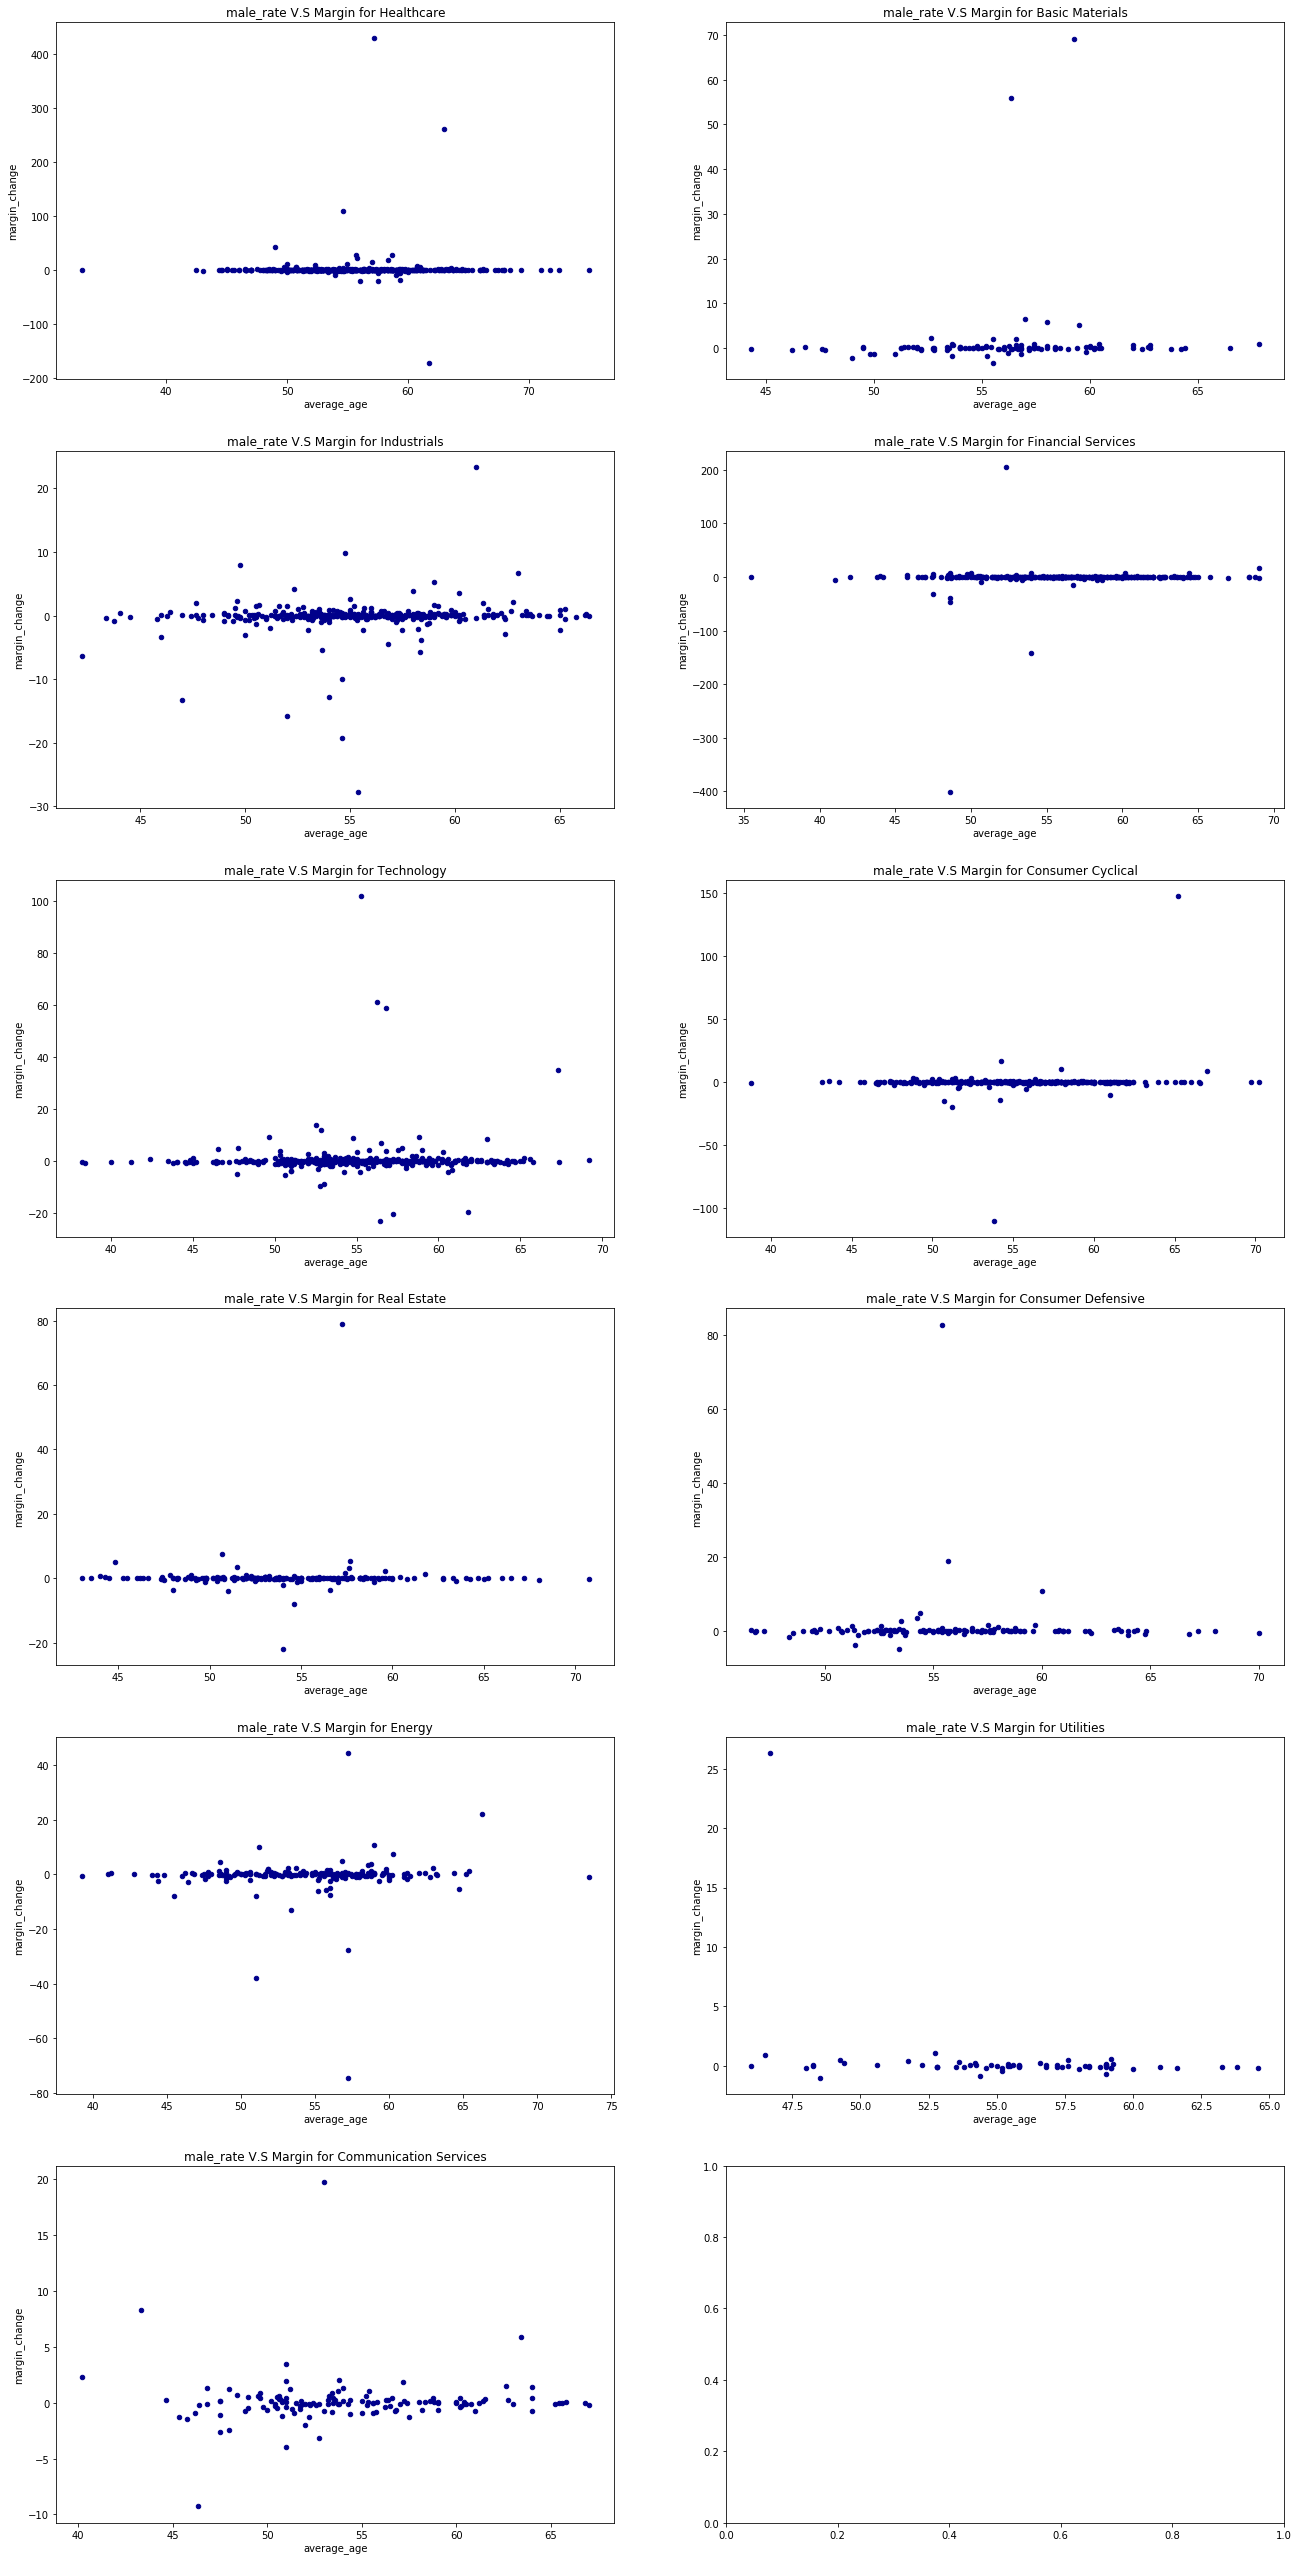

In [169]:
%matplotlib inline
COL_NUM = 2
ROW_NUM = 6
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(22,46))

i = 0
for key in d.keys():
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    d[key].plot.scatter(x='average_age',
                      y='margin_change',
                      c='DarkBlue',
                title = f'male_rate V.S Margin for {key}',ax = ax)
    i += 1
    
plt.tight_layout()

In [171]:
correlation = df.corr()

In [172]:
correlation.to_csv('correlation.csv')